In [1]:
import tensorflow as tf

2023-02-23 21:01:06.874606: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train/256, x_test/256

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

2023-02-23 21:05:15.306638: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
%%time

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=1000, verbose=1)

Epoch 1/10
60/60 [==============================] - 5s 64ms/step - loss: 0.4752 - accuracy: 0.8702 - val_loss: 0.2295 - val_accuracy: 0.9350
Epoch 2/10
60/60 [==============================] - 6s 97ms/step - loss: 0.1939 - accuracy: 0.9452 - val_loss: 0.1604 - val_accuracy: 0.9517
Epoch 3/10
60/60 [==============================] - 5s 75ms/step - loss: 0.1395 - accuracy: 0.9604 - val_loss: 0.1265 - val_accuracy: 0.9635
Epoch 4/10
60/60 [==============================] - 4s 72ms/step - loss: 0.1068 - accuracy: 0.9703 - val_loss: 0.1086 - val_accuracy: 0.9667
Epoch 5/10
60/60 [==============================] - 4s 65ms/step - loss: 0.0864 - accuracy: 0.9761 - val_loss: 0.0932 - val_accuracy: 0.9724
Epoch 6/10
60/60 [==============================] - 4s 66ms/step - loss: 0.0696 - accuracy: 0.9813 - val_loss: 0.0834 - val_accuracy: 0.9753
Epoch 7/10
60/60 [==============================] - 4s 69ms/step - loss: 0.0588 - accuracy: 0.9841 - val_loss: 0.0797 - val_accuracy: 0.9758
Epoch 8/10
60

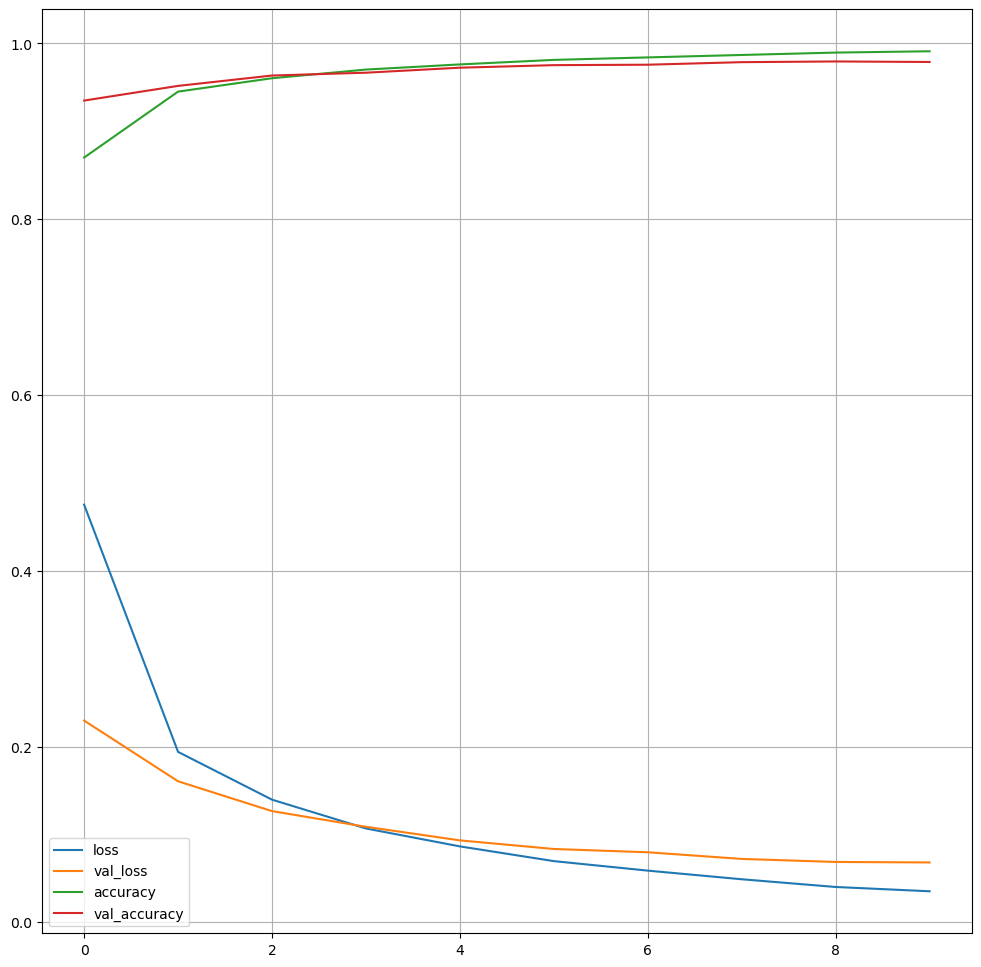

In [5]:
import matplotlib.pyplot as plt

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,12))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [6]:
score = model.evaluate(x_test, y_test)
score

313/313 [==============================] - 3s 7ms/step - loss: 0.0681 - accuracy: 0.9789


[0.06807582080364227, 0.9789000153541565]

In [13]:
import numpy as np

predict_result = model.predict(x_test)
predict_labels = np.argmax(predict_result, axis=1)

313/313 [==============================] - 2s 6ms/step


In [14]:
predict_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [15]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [16]:
wrong_result = []

for n in range(len(y_test)):
    if predict_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

211

In [17]:
import random

samples = random.choices(population=wrong_result, k =16)

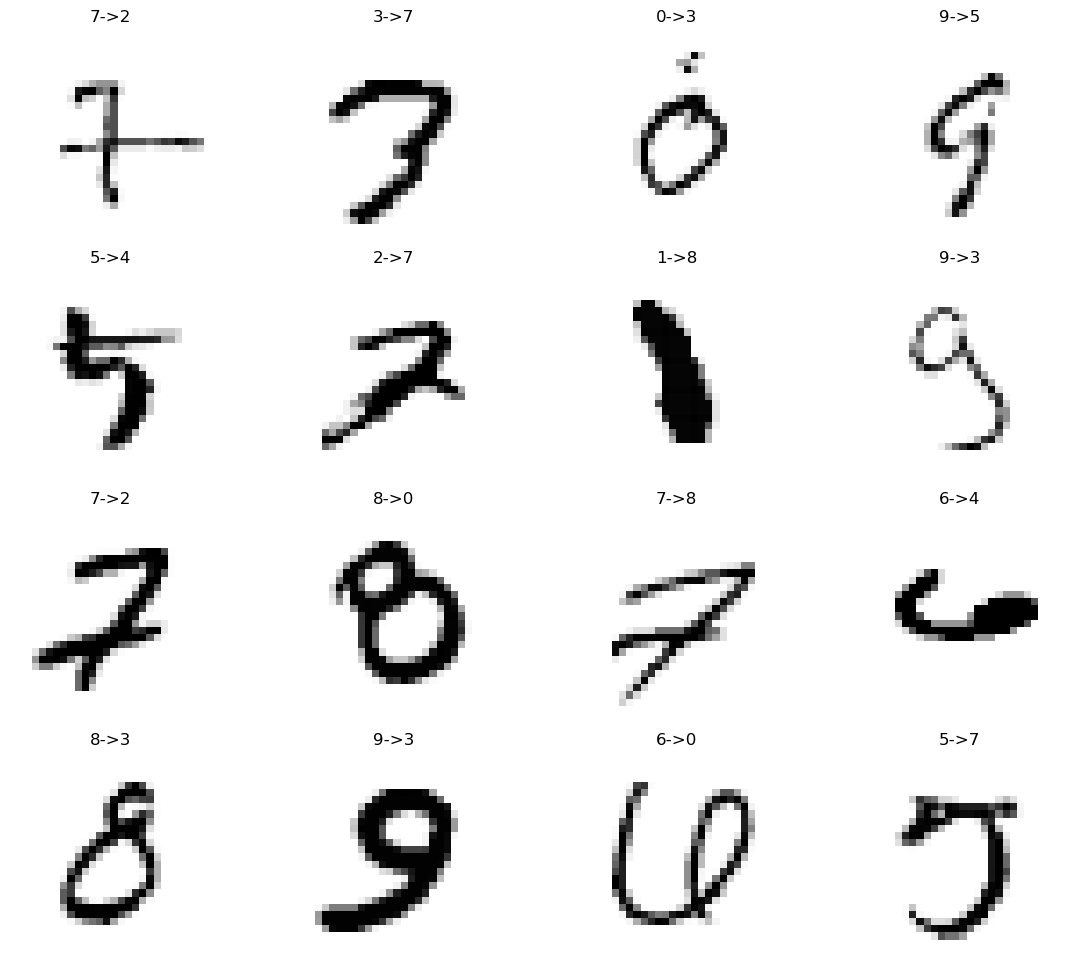

In [21]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys')
    plt.title(str(y_test[n]) + "->" + str(predict_labels[n]))
    plt.axis('off')
plt.show()

In [22]:

fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train,X_test = X_train/256, X_test/256

4422102/4422102 [==============================] - 0s 0us/step


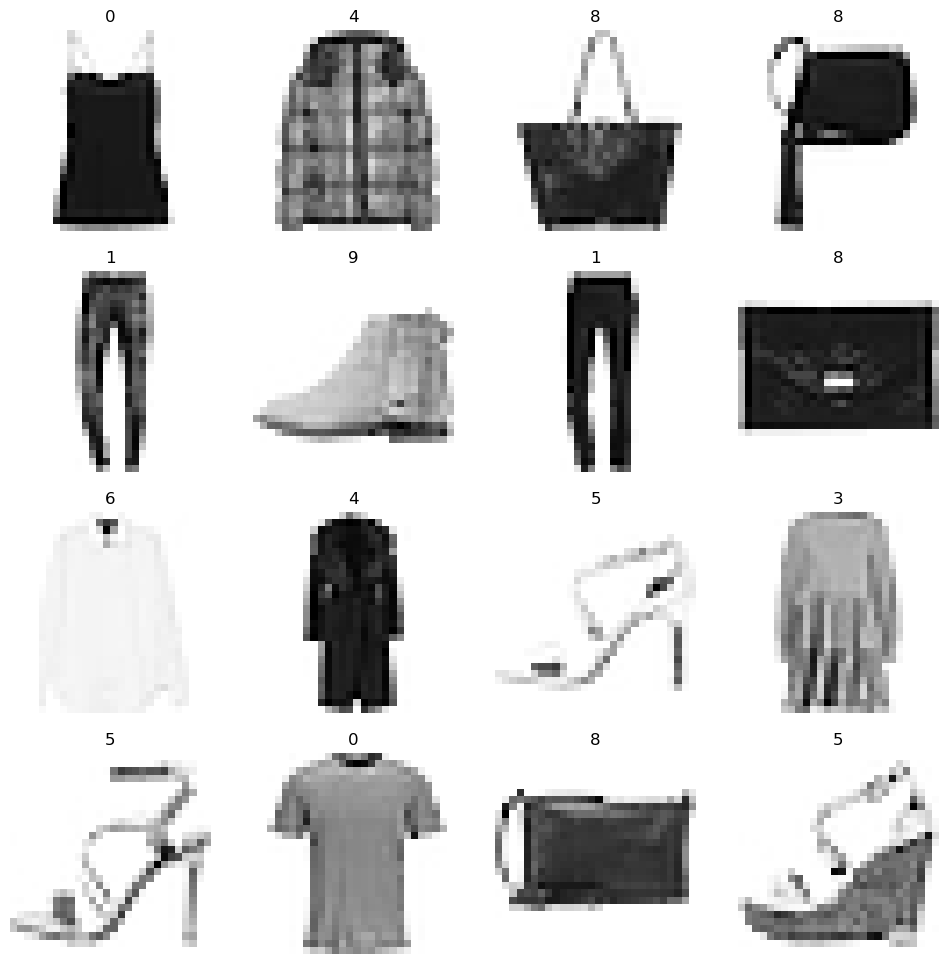

In [25]:
samples = random.choices(population=range(0, len(y_train)), k=16)

plt.figure(figsize=(12,12))

for idx, n in enumerate(samples):
    plt.subplot(4,4, idx+1)
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys')
    plt.title(str(y_train[n]))
    plt.axis('off')
plt.show()

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
%%time

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=500, verbose=1)

Epoch 1/10
120/120 [==============================] - 7s 46ms/step - loss: 0.5729 - accuracy: 0.8009 - val_loss: 0.4533 - val_accuracy: 0.8402
Epoch 2/10
120/120 [==============================] - 5s 44ms/step - loss: 0.3976 - accuracy: 0.8604 - val_loss: 0.3934 - val_accuracy: 0.8602
Epoch 3/10
120/120 [==============================] - 5s 42ms/step - loss: 0.3527 - accuracy: 0.8749 - val_loss: 0.3810 - val_accuracy: 0.8669
Epoch 4/10
120/120 [==============================] - 6s 47ms/step - loss: 0.3281 - accuracy: 0.8830 - val_loss: 0.3631 - val_accuracy: 0.8686
Epoch 5/10
120/120 [==============================] - 5s 44ms/step - loss: 0.3054 - accuracy: 0.8889 - val_loss: 0.3543 - val_accuracy: 0.8745
Epoch 6/10
120/120 [==============================] - 4s 36ms/step - loss: 0.2884 - accuracy: 0.8950 - val_loss: 0.3518 - val_accuracy: 0.8724
Epoch 7/10
120/120 [==============================] - 6s 46ms/step - loss: 0.2775 - accuracy: 0.8996 - val_loss: 0.3281 - val_accuracy: 0.8826

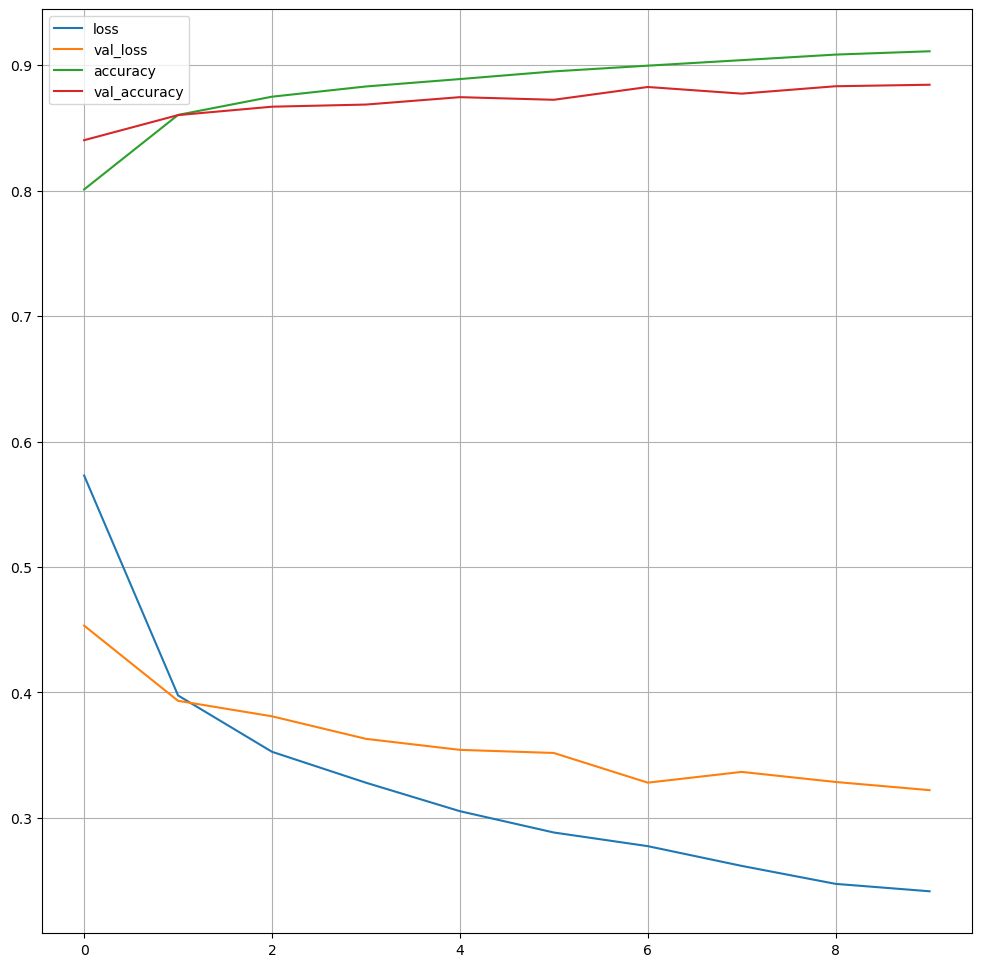

In [28]:
import matplotlib.pyplot as plt

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,12))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()